<a href="https://colab.research.google.com/github/blankspace24/ml/blob/main/gradientboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [47]:
house=fetch_california_housing()
x=pd.DataFrame(house.data,columns=house.feature_names)
y=pd.Series(house.target)


In [48]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
y[1:10]

1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=35)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gr = GradientBoostingRegressor(max_depth=2, n_estimators=6, learning_rate=1)

In [52]:
model=gr.fit(x_train,y_train)

In [61]:
y_pred=model.predict(x_test)
r2_score(y_pred,y_test)

0.5440225604778774

In [54]:
feature_names = np.array(house.feature_names)

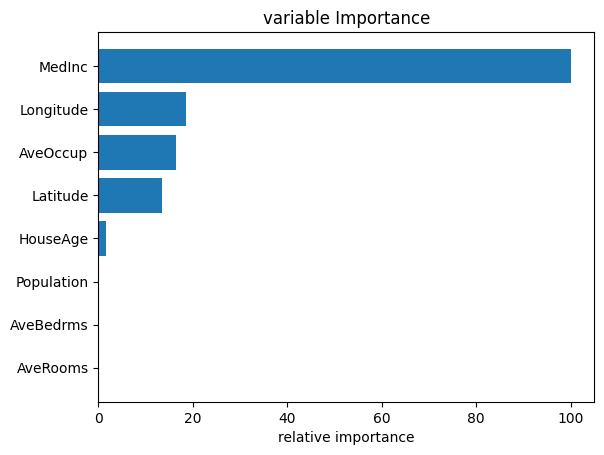

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance=model.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,feature_names[sorted_idx])
plt.xlabel('relative importance')
plt.title('variable Importance')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV
lr={'learning_rate':[0.15,0.1,0.10,0.55],'n_estimators':[25,10,5,6]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=lr,scoring='r2')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.55, 'n_estimators': 25}, 0.7791943021509803)

6
